## **Cannabis Use Prediction**
## **Summary** 
This project aims to predict cannabis use based on demographic patterns, personality traits, and nicotine use. A survey collected between 2011 to 2012 of 1885 respondents from the UCI Machine Learning repository was used as the main sample. By using age, gender, education, Big Five personality traits, and nicotine use as predictors, we predicted how likely an individual is to use cannabis. Based on the analysis, we were able to predict an individual's probability of using cannabis with a 81% accuracy rate, using a 5-fold cross-validation and a K-nearest neighbors classification algorithm with 23 neighbors. The findings suggest that the algorithm can be used in the future with a satisfactorily high degree of certainty in regards to its outputs.

## **Introduction**

Cannabis is a drug derived from the plant Cannabis. Commonly smoked, it can alter mental and physical states. With more and more governments around the globe legalizing recreational and/or medical cannabis use in recent years, its popularity has surged.  
Meanwhile, nicotine is commonly consumed by smoking and alters the mood. Given that nicotine is consumed in a similar way and also in a similar context as cannabis, we wonder if there is a relationship between the use of those drugs. This provokes the idea of determining what demographic patterns such as age and ethnicity there are among the people who have followed this trend.  Furthermore, personality traits, specifically those in the Five Factor Model of personality (i.e. openness, conscientiousness, extraversion, agreeableness, and neuroticism) have been shown to contribute to a person’s drug usage. 
According to Digman (1990), these traits can be described as follows: openness refers to a preference for novelty, conscientiousness explains one's tendency to be organized and careful, extraversion refers to one's preference for being in the company of others, agreeableness is a measure of one's level of agreement with others and neuroticism indicates a predisposition to experience stress and negative emotions. Marijuana use is commonly seen in people having high openness (Oscore), low agreeableness (Ascore), low extraversion (Escore) and average neuroticism (Nscore), whereas smokers in general have a higher neuroticism (Nscore), lower agreeableness (Ascore), and lower conscientiousness (Cscore) (Terracciano et al. , 2008). Furthermore, it has been found that a high level of neuroticism (Nscore) and low scores on agreeableness (Ascore) and conscientiousness (Cscore) are associated with addictive behaviour – these individuals have been described as more likely to experience negative emotions (high neuroticism), more likely to act on impulses, and engage in careless behaviour (low conscientiousness), as well as be more likely to stick to their own opinions (low agreeableness) (Dash et al., 2019).

Thus, we pose the question, can we predict cannabis use based on demographics, the Big Five personality traits, and nicotine use?
We chose to use the drug consumption dataset from the UCI Machine Learning repository. The dataset is a survey collected between 2011 to 2012 of 1885 respondents questioned about their usage of 18 drugs (Fehrman et al. 2017). The survey also collected information about their personality (NEO-FFI-R, BIS-11, ImpSS) and demographics (level of education, age, country of residence, ethnicity, and gender).





## **Methods & Results**

We conducted our data analysis by using demographics (columns Age, Gender, Education),  scores of each of the Big Five personality traits (columns Oscore, Cscore, Escore, Ascore, Nscore), and nicotine use (column Nicotine) as the predictors. Based on these variables, we attempted to predict how likely an individual is to use cannabis (column Cannabis), our target variable. 
We chose not to use Ethnicity, Country, BIS-11, ImpSS, and the other drugs’ consumptions as predictors and only focused on nicotine usage. We decided to omit ethnicity and country because the data set included a very limited variety of answers in those two variables (e.g. far too often returning White for ethnicity). Furthermore, since most of the literature we found about the relationship between drug use and personality included only Big Five Personality traits, we opted for omitting the other measures of personality. In using 8 predictors, we aimed to balance obtaining a meaningful insight from our data (by increasing our number of predictors) while also limiting the amount of variables to simplify the scope of our report (by decreasing our number of predictors). Previous research has shown correlations between personality and drug usage and thus, we believe that the Big Five Personality Traits, prior nicotine use, and demographics like age and gender would certainly play a role in cannabis use.
Lastly, in order to perform a more focused analysis, we decided to choose only two drugs to concentrate on: nicotine and cannabis. As mentioned before, this choice was guided by the fact that these two drugs are similar in terms of context and method of use. 


In [1]:
#load the necessary libraries.
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(tidyr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ─────────────────────────────────────────────────────────────────────────────

In [2]:
# Setting the seed
set.seed(1) 

In [3]:
source("./../R/load-data-script.R")

colnames <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", 
                                       "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", 
                                       "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", 
                                       "Meth", "Mushrooms", "Nicotine", "Semer", "VSA")

raw_data <- initial_data("./../data/drug_consumption.csv", colnames)
head(raw_data)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,⋯,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,⋯,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


Table 1. Summary table of the entire dataset

Now, we see that the drug usage is denoted as follows:  
CL0: never used the drug  
CL1: used the drug over a decade ago;  
CL2: used the drug in the last decade;  
CL3: used the drug in the last year;  
CL4: used the drug in the last month;  
CL5: used the drug in the last week;  
CL6: used the drug in the last day.

We assume that someone who used the drug more than a year ago is not to be considered a user, so we will mutate the values CL0, CL1, and CL2 to no (does not use) and the rest to yes (used recently/still using).

In [4]:
drugs <- select(raw_data, Age, Gender, Nscore, Escore, Oscore, Ascore, Nicotine, Cannabis) %>% 
         mutate(Cannabis = str_replace_all(Cannabis, c("CL0" = "no", "CL1" = "no", "CL2" = "no", "CL3" = "yes", "CL4" = "yes", "CL5" = "yes", "CL6" = "yes"))) %>%          
         mutate(Cannabis = as_factor(Cannabis)) %>% 
         mutate(Nicotine = str_replace_all(Nicotine, c("CL0" = "no", "CL1" = "no", "CL2" = "no", "CL3" = "yes", "CL4" = "yes", "CL5" = "yes", "CL6" = "yes")))

head(drugs)

,Age,Gender,Nscore,Escore,Oscore,Ascore,Nicotine,Cannabis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,-0.07854,-0.48246,-0.67825,1.93886,1.43533,0.76096,yes,yes
2,0.49788,-0.48246,-0.46725,0.80523,-0.84732,-1.62090,no,yes
3,-0.95197,0.48246,-0.14882,-0.80615,-0.01928,0.59042,no,no
4,0.49788,0.48246,0.73545,-1.63340,-0.45174,-0.30172,no,yes
5,2.59171,0.48246,-0.67825,-0.30033,-1.55521,2.03972,yes,no
6,1.09449,-0.48246,-0.46725,-1.09207,-0.45174,-0.30172,yes,no


Table 2. Summary table of the dataset used in the analysis

We used set.seed(1) to make sure results are reproducible. We then split the data into a training and a testing set (75% training, 25% testing), this gives us enough data to train our classifier with, while still giving us 470 testing variables. 
Furthermore, since nicotine will be used as a predictor, we want the testing set to have nicotine as a numeric variable.

In [5]:
source("./../R/train-test-script.R")

train_test_data <- split_dataset(drugs, 'Cannabis', 'Nicotine')

#Train and test data
training_data <- data.frame(train_test_data[1])
testing_data <- data.frame(train_test_data[2])

#setting predictor as numeric value
testing_data <- mutate(testing_data, Nicotine = str_replace_all(Nicotine, c("no" = "0", "yes" = "1"))) %>% mutate(Nicotine = as.numeric(Nicotine))

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(strata_variable)

  # Now:
  data %>% select(all_of(strata_variable))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


**Data cleaning and wrangling**

In [6]:
source("./../R/clean-wrangle-data.R")

group_labels <- c("Neither", "Cannabis only", "Nicotine only", "Both") 

cannabis_and_nicotine <- wrangle_training_data(training_data, Nicotine, Cannabis, group_labels)

`summarise()` has grouped output by 'Nicotine'. You can override using the `.groups` argument.


Table 3. Table of the number of individuals (n) that fall into each label

### Visualizations

First, we are interested in understanding the pattern of cannabis and nicotine consumption in our sample. 

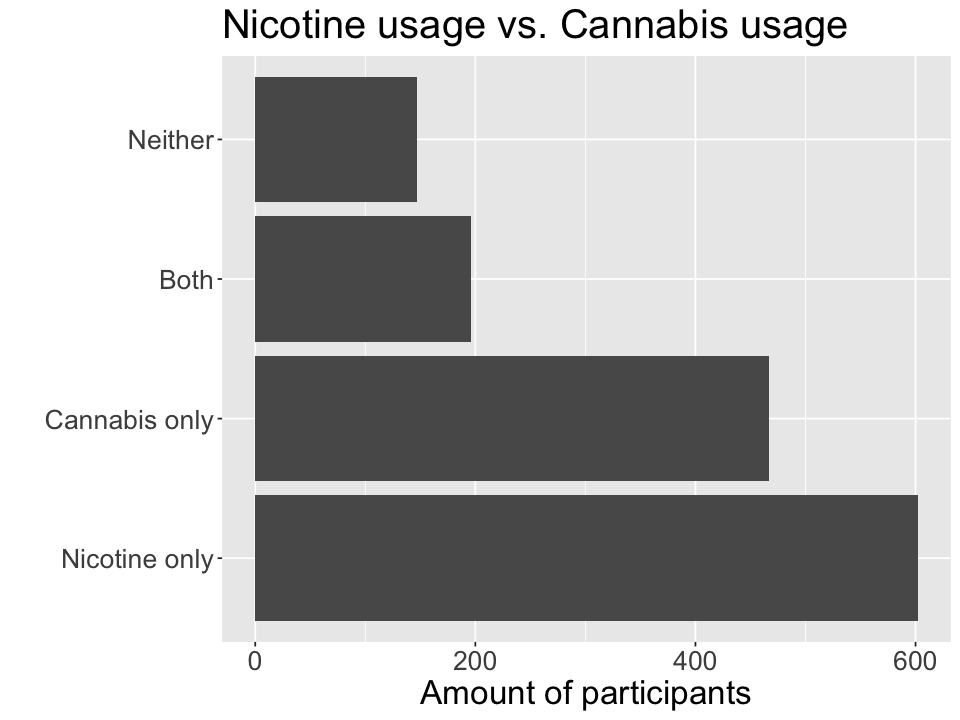

In [7]:
source("./../R/plots-script.R")
cannabis_and_nicotine_graph <- horizontal_hist(cannabis_and_nicotine, label, n, "", "Amount of participants", 
                                               "Nicotine usage vs. Cannabis usage", plot_width = 8, plot_height = 6)

cannabis_and_nicotine_graph

Figure 1. Horizontal histogram of Nicotine usage vs Cannabis usage. 

Another relationship that we are interested in exploring is how the personality trait "Openness", which measures how willing people are to try new things, plays into marijuana and nicotine consumption. Here, we will make a new column called rate to express the percentage of each group that uses cannabis, as the data has been standardized and looking at raw marijuana user data will simply give us a normal distribution.

In [8]:
## Here, we will make a new column called rate to express the percentage of each group that uses cannabis, as the data 
## has been standardized and looking at raw marijuana user data will simply give us a normal distribution.

OpenNicWeed <- group_by(training_data, Oscore, Nicotine, Cannabis) %>%
               summarize(n = n()) %>%
               pivot_wider(names_from = Cannabis, values_from = n) %>%
               replace(is.na(.), 0) %>%  # To make sure 0s don't get read as NAs
               mutate(total = yes + no) %>%  # To find rate
               mutate(rate = yes / total * 100)


`summarise()` has grouped output by 'Oscore', 'Nicotine'. You can override using the `.groups` argument.


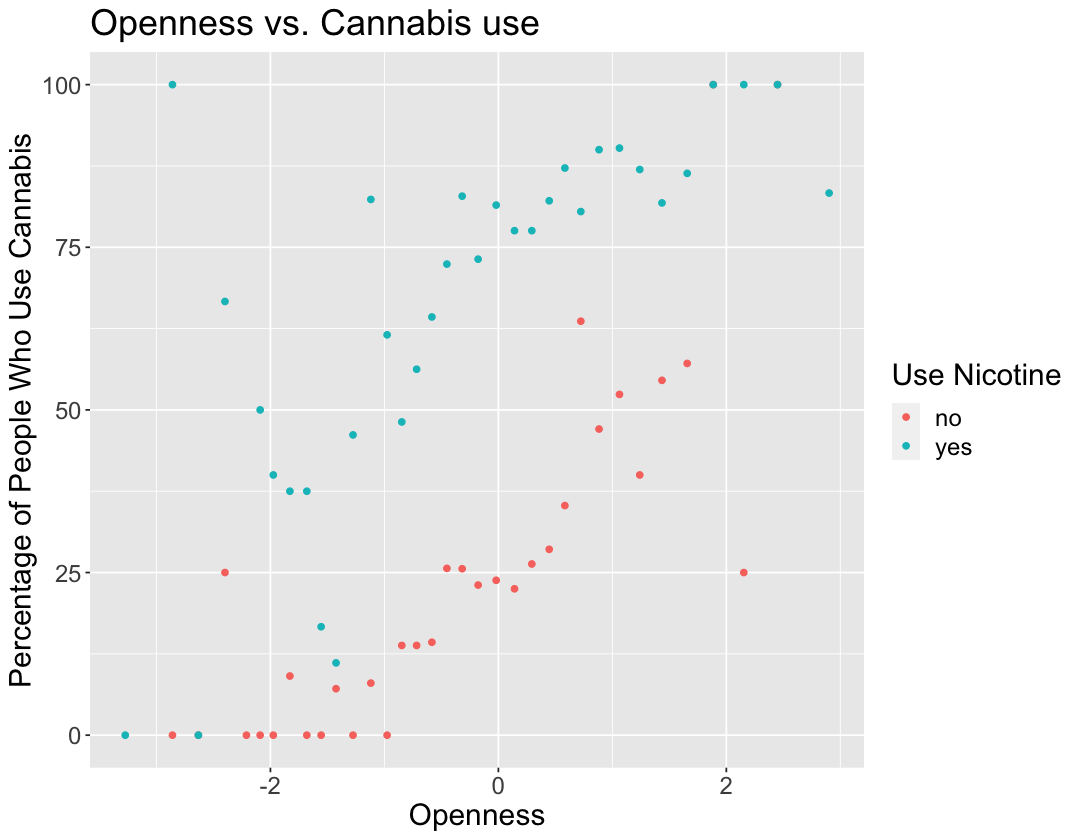

In [9]:
source("./../R/plots-script.R")

scatterplot(OpenNicWeed, Oscore, rate, Nicotine, "Openness", "Percentage of People Who Use Cannabis", "Use Nicotine", "Openness vs. Cannabis use", plot_width = 9, plot_height = 7)

Figure 2. Scatter plot of cannabis use % vs openness. Openness is the standardized personality Oscore.

We see that the rate of cannabis and nicotine users increases with larger openness scores, and we can also see that there are more people that use both nicotine and cannabis than people who use strictly only cannabis (more blue than red data points).

In [10]:
# Need Nicotine to be numeric and standardized in order to use it

drug_data <- mutate(training_data, Nicotine = str_replace_all(Nicotine, c("yes" = "1","no" = "0"))) %>% 
             mutate(Nicotine = as.numeric(Nicotine))

head(drug_data)

,Age,Gender,Nscore,Escore,Oscore,Ascore,Nicotine,Cannabis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,-0.95197,0.48246,-0.14882,-0.80615,-0.01928,0.59042,0,no
5,2.59171,0.48246,-0.67825,-0.30033,-1.55521,2.03972,1,no
6,1.09449,-0.48246,-0.46725,-1.09207,-0.45174,-0.30172,1,no
7,0.49788,-0.48246,-1.32828,1.93886,-0.84732,-0.30172,0,no
8,0.49788,0.48246,0.62967,2.57309,-0.97631,0.76096,1,no
9,1.82213,-0.48246,-0.24649,0.00332,-1.42424,0.59042,1,no


Table 4. Table of used predictors with Nicotine standardized, where Nicotine = 1 indicates nicotine use and Nicotine = 0 indicates no nicotine use.

### Classification 
Firstly, we must tune our classifier in order to find the optimal number of neighbours to be used in our model.

In [ ]:
source("./../R/classification_model_tuning_script.R")

drugs_spec <- create_knn_spec("rectangular")
drugs_recipe <- create_recipe(drug_data, 'Cannabis') 
drugs_vfold <- create_vfold(drug_data, 5, 'Cannabis')
gridvals <- create_grid(1, 30)
drugs_workflow <- create_workflow(drugs_recipe, drugs_spec, drugs_vfold, gridvals)

head(drugs_workflow)

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(strata)

  # Now:
  data %>% select(all_of(strata))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


Table 5. Table of  accuracy estimates and standard error outputs corresponding to a few different values of K-neighbours.

In [ ]:
source("./../R/plots-script.R")
acc_plot <- accuracy_plot(drugs_workflow, 
              x_label = "Number of Neighbors", 
              y_label = "Accuracy Estimate", 
              plot_title = "Neighbors vs. Accuracy")

acc_plot

Figure 3. Plot of accuracy estimate versus number of neighbours. Mean accuracy in % for different values of K-neighbours. K = 23 and K = 24 yield the highest accuracies, and after K exceeds 24, accuracy starts to decline.

From the graph plotted in Figure 8, we can see that the numbers of neighbours that give us the highest mean accuracy is 23 and 24. Because the drop in accuracy from 24 to 25 is much greater than the drop from 23 to 22, we have decided to use 23 as our K. It should be noted that using some other values for K would be just as reasonable in this case, e.g. 21, since the difference in accuracy is less than 1%.

In [ ]:
source("./../R/fit-model-script.R")
source("./../R/predict-script.R")

knn_fit <- fit_knn(data = drug_data, drugs_recipe, neighbors = 23)
drugs_pred <- predict_drugs_workflow(knn_fit, testing_data)

head(drugs_pred)

Table 6. Table of prediction outputs for cannabis use. Predictors except Nicotine are scaled and therefore do not provide a clear indication of what predictor values contribute to suggesting that someone would use/not use cannabis. Nicotine = 1 indicates nicotine use and Nicotine = 0 indicates no nicotine use.

Now, we pull the final accuracy rate for our classifier. 

In [ ]:
# Pulling final accuracy for our classifier
source("./../R/model-accuracy-script.R")

drug_acc <- calculate_accuracy(drugs_pred, truth_variable = 'Cannabis')
drug_acc

The result is an accuracy of approximately 0.809 or 80.9%.

## **Discussion**
### Summary of findings
By training our model by performing a 5-fold cross-validation and using 23 as the number of neighbours in our K-nearest neighbours classification algorithm, we were able to predict one's probability of using Cannabis based on age, gender, education and personality scores with a 80.9% accuracy.

### Evaluation of findings
From our analysis, we expected to find that our predictors as a whole would be able to accurately classify someone's likelihood to be a cannabis user. This was expected due to the fact that all of our predictors have been linked to cannabis use in past research, in particular, personality traits such as Openness and Agreeableness. Previous research has shown that there is a correlation between personality and drug use (Terracciano et al, 2008). The use of the predictor of nicotine, as well as age has also been documented where peer influence in adolescents has also been shown, where nicotine and cannabis were consumed in conjunction with each (Harold et al 2021). 
 
What we found matched our forecast: we were able to predict a person's probability of using cannabis with a 79% accuracy rate. Even though this rate is not as accurate as it has been in other studies and also not as high as we initially hoped, we believe it is high enough for us to say that our algorithm can be used in the future with a satisfactorily high degree of certainty in regards to its outputs.
 
### Limitations
Despite our findings, there are a few notable shortcomings, namely that we cannot deduce how much one variable alone, for example, nicotine use, affects predicting cannabis use; if we were interested in analyzing that, we would have to make many, many classifications with one variable paired with cannabis use at a time, which unfortunately would not be very practical. Additionally, another flaw, although to a lesser extent would be that our data is somewhat large and we have many predictors, so in choosing to use K-nn classification (which does not perform well in those conditions), our model’s accuracy may have been hindered. Lastly, it's also important to remember that this data was collected mainly from Western countries such as the UK and the US, which likely impact how generalizable our model will be. Thus, if we decide to use this same algorithm with a data set from a non-Western origin, we must be extremely cautious when evaluating the results.
 
### Impact 
By identifying potential predictors for cannabis use such as personality traits or demographics, this may lead to impacts like being able to identify potential marijuana users, as well as aid in public health modeling and future policy-making regarding Cannabis. This can also potentially spread awareness and education of the drug across communities experiencing drug-use crises. 
 
Our findings may also lead to future questions e.g. Are the types of people most likely to use Cannabis also likely to use stronger, or possibly illicit drugs? Do the type of people unlikely to use Cannabis not use any other drugs, or do they prefer some other drug, and if so, which one(s)? Is the likelihood to use a certain drug strongly linked to other demographic factors such as income or country of origin? Finding the answers to these questions may help countries to not only shape their internal approaches to drug-related public policies but also better inform international committees, such as the United Nations Office on Drugs and Crime, on their policy recommendations.


## **References**
 
Dash, G. F., Slutske, W. S., Martin, N. G., Statham, D. J., Agrawal, A., & Lynskey, M. T. (2019). Big Five personality traits and alcohol, nicotine, cannabis, and gambling disorder comorbidity. Psychology of Addictive Behaviors, 33(4), 420–429. https://doi.org/10.1037/adb0000468 

Digman, J. M. (1990). Personality Structure: Emergence of the Five-Factor Model. Annual Review of Psychology, 41(1), 417–440. https://doi.org/10.1146/annurev.ps.41.020190.002221 

Herold, R., Boykan, R., Eliscu, A., Alcala, H. E., & Goniewicz, M. L. (2021). Association between
	friends' use of nicotine and cannabis and intake of both substances among adolescents.
	International Journal of Environmental Research and Public Health, 18(2), 695.
	https://doi.org/10.3390/ijerph18020695

Fehrman, E., Muhammad, A. K., Mirkes, E. M., Egan, V., & Gorban, A. N. (2017). The five factor model of personality and evaluation of drug consumption risk. In F. Palumbo, M. Vichi eds & A. Montanari (Eds.), (pp. 231-242) 

Terracciano, A., Loeckenhoff, C. E., Crum, R. M., Bienvenu, O. J., & Costa, P. T. (2008). Five-factor model personality profiles of drug users. BMC Psychiatry, 8(1), 22-22. 
